In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv("train.csv")

In [2]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

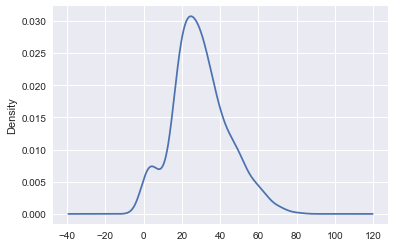

In [4]:
titanic.Age.plot(kind = "kde")

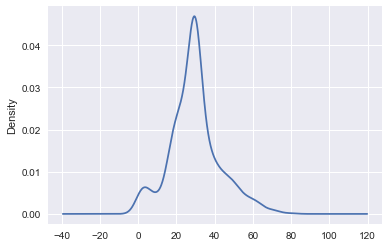

In [5]:
titanic.Age.fillna(titanic.Age.mean() , inplace = True)
titanic.Age.plot(kind ="kde")

In [6]:
titanic.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [7]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
titanic.Embarked.fillna("S",inplace = True)

In [9]:
titanic.Cabin.describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

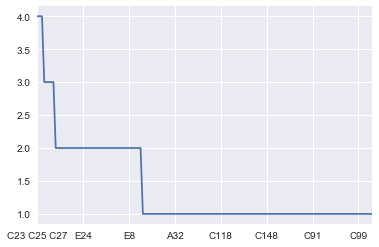

In [10]:
titanic.Cabin.value_counts().plot()

In [11]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


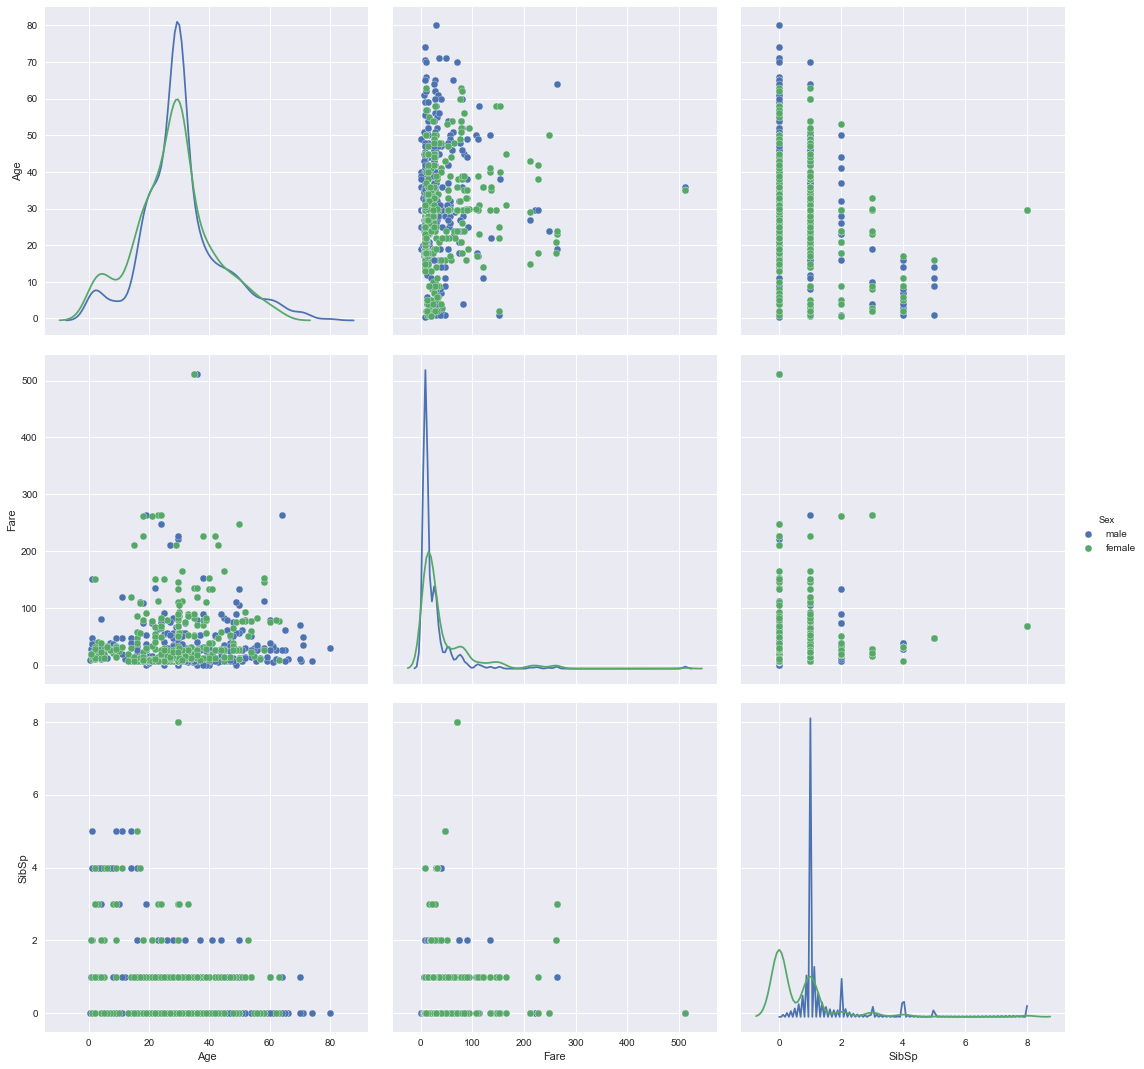

In [12]:
sns.pairplot(data = titanic,diag_kind="kde",vars = ["Age","Fare","SibSp"],hue = "Sex",size = 5)

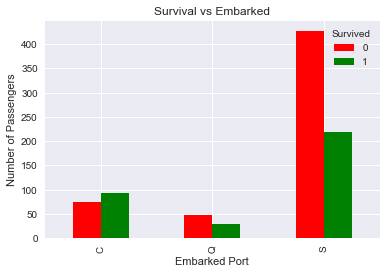

In [12]:
titanic.groupby("Embarked").Survived.value_counts().unstack().plot(kind = "bar",color= ["red","green"])

plt.title("Survival vs Embarked")
plt.xlabel("Embarked Port")
plt.ylabel("Number of Passengers")

In [14]:
sib_data = titanic.groupby("SibSp").Survived.value_counts().unstack()
sib_data

Survived,0,1
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,NaN
8,7.0,NaN


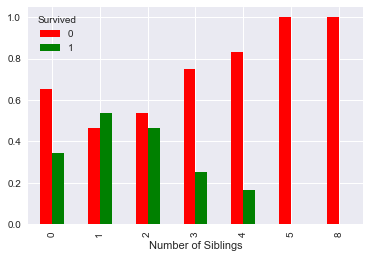

In [15]:
sib_data.div(sib_data.sum(1),0).plot(kind = "bar", color = ["red","green"])
plt.xlabel("Number of Siblings")

In [16]:
titanic["Status"] = np.where((titanic.SibSp ==0) & (titanic.Parch ==0),"Alone","Not Alone")

In [17]:
com_status = titanic.groupby("Status").Survived.value_counts().unstack()

In [18]:
com_status.sum(1)

Status
Alone        537
Not Alone    354
dtype: int64

In [23]:
com_status.div(com_status.sum(1),0)

Survived,0,1
Status,,
Alone,0.696462,0.303538
Not Alone,0.494350,0.505650


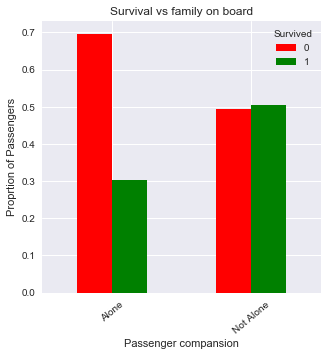

In [18]:
com_status.div(com_status.sum(1),0).plot(kind = "bar",color=["red","green"],figsize = (5,5),rot = 40)
plt.xlabel("Passenger compansion")
plt.ylabel("Proprtion of Passengers")
plt.title("Survival vs family on board")

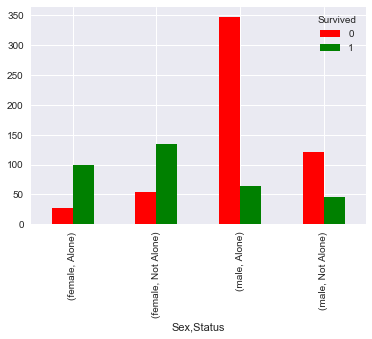

In [19]:
titanic.groupby(["Sex","Status"]).Survived.value_counts().unstack().plot(kind ="bar",color = ["red","green"])

In [88]:
Status_by_sex = titanic.groupby(["Sex","Status"]).Survived.value_counts()

In [89]:
Status_by_sex.unstack()

Survived            0    1
Sex    Status             
female Alone       27   99
       Not Alone   54  134
male   Alone      347   64
       Not Alone  121   45

In [90]:
Status_by_sex.loc["male"].unstack()

Survived,0,1
Status,,
Alone,347,64
Not Alone,121,45


In [133]:
female_status = Status_by_sex.loc["female"].unstack()
female_status

Survived,0,1
Status,,
Alone,27,99
Not Alone,54,134


In [135]:
female_status.sum(1)

Status
Alone        126
Not Alone    188
dtype: int64

In [137]:
female_status = female_status.div(female_status.sum(1),0)

In [98]:
female_status[0]

Status
Alone        27
Not Alone    54
Name: 0, dtype: int64

In [123]:
male_status = Status_by_sex.loc["male"].unstack()
male_status[1]

Status
Alone        64
Not Alone    45
Name: 1, dtype: int64

In [143]:
male_status  = male_status.div(male_status.sum(1),0)

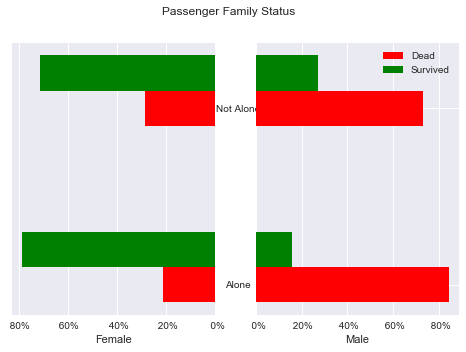

In [144]:
fig, (ax_left, ax_right) = plt.subplots(ncols=2,figsize = (8,5))
ax_left.barh(bottom =[1,2],width =female_status[0] ,height = 0.2, align='center', facecolor='red',label ="Dead")
ax_left.barh(bottom = [1.2,2.2],width =female_status[1],height = 0.2, align='center', facecolor='green', label ="Survived")
ax_left.set_yticks([])
# ax_left.set_xticks(range(1,4))
ax_left.set_xlabel('Female')
ax_left.invert_xaxis()


ax_right.barh(bottom =[1,2] ,width = male_status[0],height = 0.2, align='center', facecolor='red', label = "Dead")
ax_right.barh(bottom =[1.2,2.2],width = male_status[1],height = 0.2, align='center', facecolor='green', label = "Survived")
ax_right.legend(loc = "upper right")
ax_right.set_yticks(range(1,3))
# x moves tick labels relative to left edge of axes in axes units
ax_right.set_yticklabels(["Alone","Not Alone"],ha='center', x=-0.055)
ax_right.set_xlabel('Male')

vals= ax_left.get_xticks()
vals
new_vals = ['{:3.0f}%'.format(x*100) for x in vals]

ax_left.set_xticklabels(new_vals)
ax_right.set_xticklabels(new_vals)
plt.suptitle('Passenger Family Status')

Survived
0    468
1    109
dtype: int64

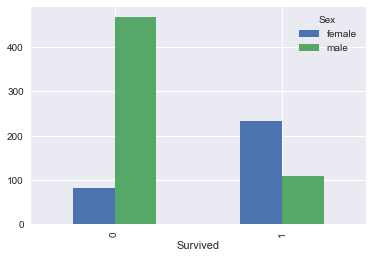

In [59]:
titanic.groupby("Sex").Survived.value_counts().unstack().T.plot(kind ="bar")

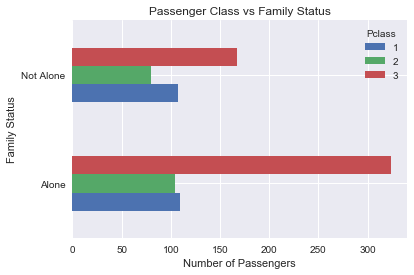

In [60]:
titanic.groupby("Pclass").Status.value_counts().sort_values(ascending = False).unstack().T.plot(kind ="barh")
plt.ylabel("Family Status")
plt.xlabel("Number of Passengers")
plt.title("Passenger Class vs Family Status")

In [61]:
cl_sex =titanic.groupby(["Sex","Pclass"]).Survived.value_counts().T.unstack()

In [62]:
cl_sex

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

In [63]:
cl_sex.sum(0)

Survived
0    549
1    342
dtype: int64

In [64]:
cl_sex.div(cl_sex.sum(0),1)

Survived              0         1
Sex    Pclass                    
female 1       0.005464  0.266082
       2       0.010929  0.204678
       3       0.131148  0.210526
male   1       0.140255  0.131579
       2       0.165756  0.049708
       3       0.546448  0.137427

In [65]:
cl_sex = cl_sex.div(cl_sex.sum(1),0).sort_index(level = 0)

In [68]:
cl_sex

Survived              0         1
Sex    Pclass                    
female 1       0.031915  0.968085
       2       0.078947  0.921053
       3       0.500000  0.500000
male   1       0.631148  0.368852
       2       0.842593  0.157407
       3       0.864553  0.135447

In [69]:
cl_sex.xs("female",level = 0)

Survived,0,1
Pclass,,
1,0.031915,0.968085
2,0.078947,0.921053
3,0.500000,0.500000


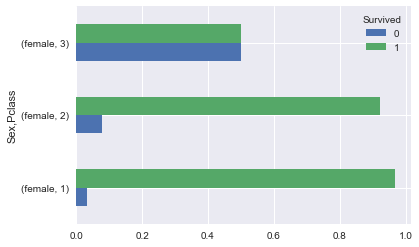

In [70]:
cl_sex.loc[("female",1):("female",3)].plot(kind= "barh")

In [131]:
m_cl_sex = cl_sex.loc[("male")]
f_cl_sex = cl_sex.loc["female"]

In [133]:
m_cl_sex

Survived,0,1
Pclass,,
1,0.515958,0.484042
2,0.769299,0.230701
3,0.799047,0.200953


In [58]:
f_cl_sex

NameError: name 'f_cl_sex' is not defined

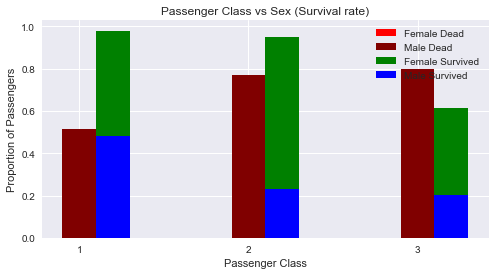

In [142]:
fig , ax = plt.subplots(figsize = (8,4))
ax.bar(left = f_cl_sex.index,width = 0.2, height = f_cl_sex[0], color = "red", label=("Female Dead"))
ax.set_xticks(range(1,4))
ax.bar(left=m_cl_sex.index , width = 0.2, height = m_cl_sex[0], color = "maroon" , label = ("Male Dead") )
ax.bar(left = f_cl_sex.index+0.2 , width = 0.2 , height = f_cl_sex[1], color = "green", label = "Female Survived")
ax.bar(left = m_cl_sex.index +0.2 , width = 0.2 , height = m_cl_sex[1], color = "blue", label = "Male Survived")
ax.legend(loc = "upper right")
ax.set_title("Passenger Class vs Sex (Survival rate)")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Proportion of Passengers")

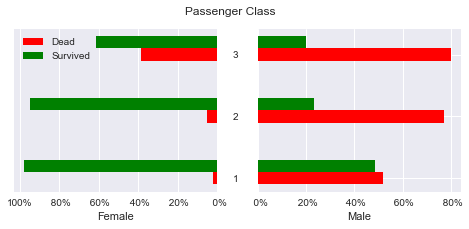

In [143]:
fig, (ax_left, ax_right) = plt.subplots(ncols=2,figsize = (8,3))
ax_left.barh(bottom = f_cl_sex.index,width =f_cl_sex[0] ,height = 0.2, align='center', facecolor='red',label = "Dead")
ax_left.barh(bottom = f_cl_sex.index+0.2,width =f_cl_sex[1] ,height = 0.2, align='center', facecolor='green', label = "Survived")
ax_left.set_yticks([])
# ax_left.set_xticks(range(1,4))
ax_left.set_xlabel('Female')
ax_left.invert_xaxis()
ax_left.legend(loc = "upper left")

ax_right.barh(bottom = m_cl_sex.index,width =m_cl_sex[0],height = 0.2, align='center', facecolor='red', label = "Male Dead")
ax_right.barh(bottom = m_cl_sex.index+0.2,width =m_cl_sex[1],height = 0.2, align='center', facecolor='green', label = "Male Dead")

ax_right.set_yticks(range(1,4))
# x moves tick labels relative to left edge of axes in axes units
ax_right.set_yticklabels(range(1,4),ha='center', x=-0.075)
ax_right.set_xlabel('Male')

vals= ax_left.get_xticks()
vals
new_vals = ['{:3.0f}%'.format(x*100) for x in vals]

ax_left.set_xticklabels(new_vals)
ax_right.set_xticklabels(new_vals)
plt.suptitle('Passenger Class')